# Part 1: Data Loading and Initial Exploration

In [27]:
import sklearn.datasets as ds
import pandas as pd

dataset = ds.fetch_california_housing()
#print(dataset)
df_features = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df_target = pd.DataFrame(dataset.target, columns=dataset.target_names)
print('#'*10 + ' Features first 5 rows ' + '#'*10 )
print(df_features.head(5))
print('#'*10 + ' Features statistics ' + '#'*10 )
print(df_features.describe())
print('#'*10 + ' Target first 5 rows ' + '#'*10 )
print(df_target.head(5))
print('#'*10 + ' Target statistics ' + '#'*10 )
print(df_target.describe())


########## Features first 5 rows ##########
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
########## Features statistics ##########
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154    

# 2. Initial model training (Baseline - without preprocessing)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=17)

class PolynomRegressor:
    def __init__(self):
        self.linreg = LinearRegression()
        self.poly = PolynomialFeatures()
    def fit(self, X_train, y_train):
        X_poly = self.poly.fit_transform(X_train)
        self.linreg.fit(X_poly, y_train)

    def predict(self, X_test):
        X_poly = self.poly.transform(X_test)
        return self.linreg.predict(X_poly)



methods = [
    "Linear Regression",
    "Polynomial Regression",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
]

baseline_mse = [0, 0, 0, 0, 0]#[0.51945366, 0.42786852, 0.51040386, 0.25964340, 0.73309148]
preproc_mse  = [0, 0, 0, 0, 0]#[0.40876046, 0.33339032, 0.48323046, 0.23198242, 0.66451866]

perf_df = pd.DataFrame({
    "Regression Method": methods,
    "Baseline MSE": baseline_mse,
    "MSE after preprocessing": preproc_mse,
})

models = [LinearRegression(), PolynomRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor()]
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)
    perf_df.iloc[i][1] = mse
    print(f'MSE from baseline model: {mse:.8f}')

print(perf_df)


/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_77719/4201936575.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_df.iloc[i][1] = mse
/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_77719/4201936575.py:46: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  perf_df.iloc[i][1] = mse
/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_77719/4201936575.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

MSE from baseline model: 0.51945366
MSE from baseline model: 0.42786852


/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_77719/4201936575.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_df.iloc[i][1] = mse
/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_77719/4201936575.py:46: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  perf_df.iloc[i][1] = mse
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE from baseline model: 0.51276241


/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_77719/4201936575.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_df.iloc[i][1] = mse
/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_77719/4201936575.py:46: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  perf_df.iloc[i][1] = mse
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE from baseline model: 0.25823229
MSE from baseline model: 0.68023052
       Regression Method  Baseline MSE  MSE after preprocessing
0      Linear Regression             0                        0
1  Polynomial Regression             0                        0
2          Decision Tree             0                        0
3          Random Forest             0                        0
4               AdaBoost             0                        0


/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_77719/4201936575.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_df.iloc[i][1] = mse
/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_77719/4201936575.py:46: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  perf_df.iloc[i][1] = mse


# 3. Outlier detection

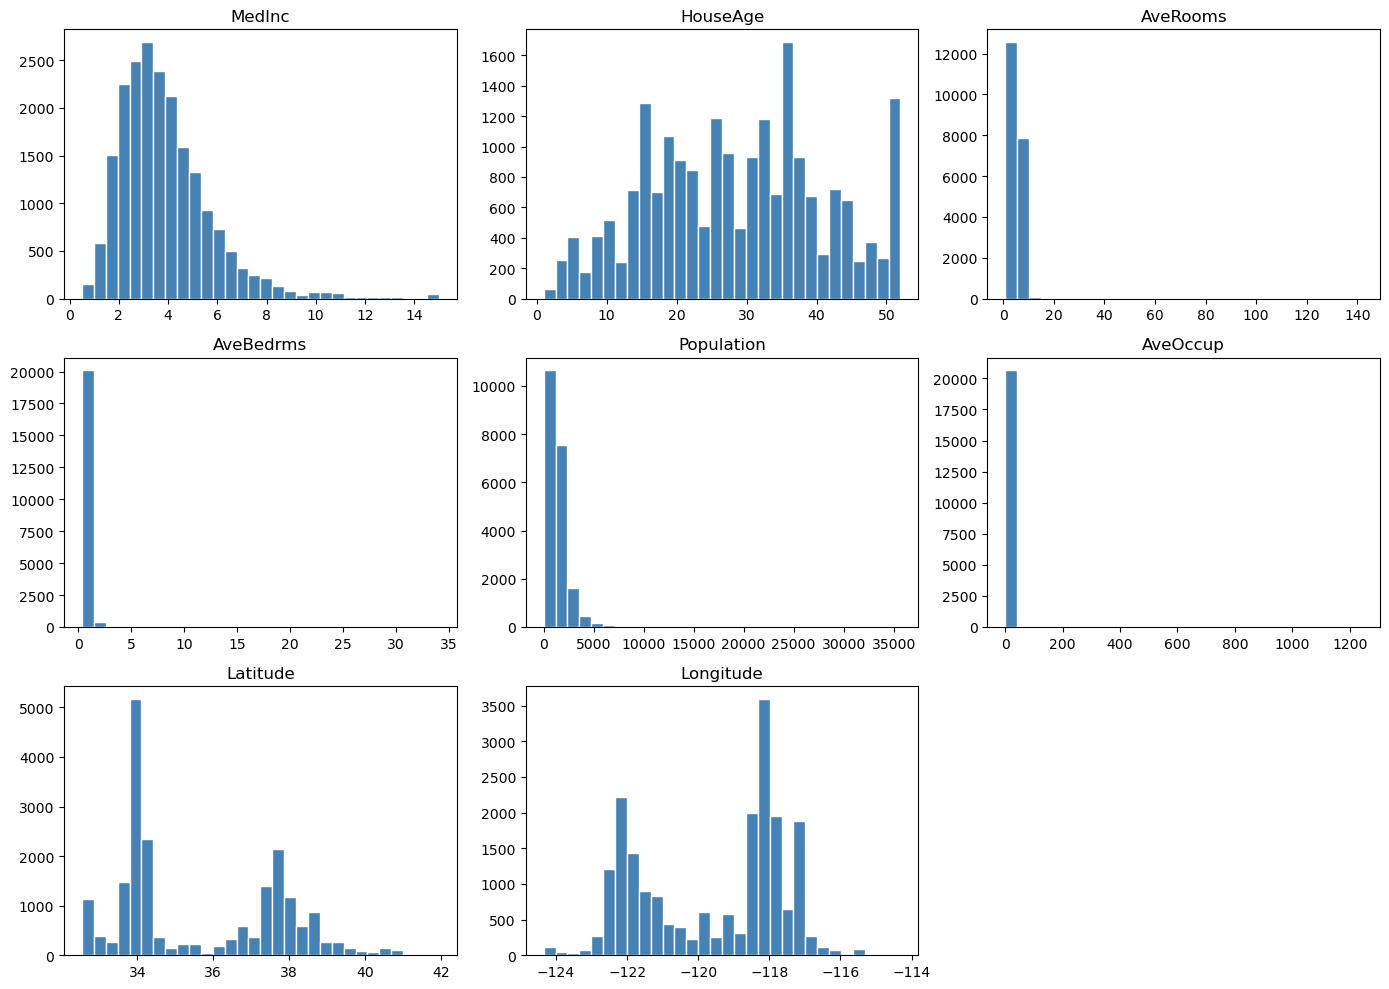

In [33]:
# plot histograms
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

ax = df_features.hist(bins=30, figsize=(14, 10), grid=False, edgecolor='white', color='steelblue')
plt.tight_layout()
plt.show()


In [36]:
# Inter-quartile range
import pandas as pd
import numpy as np

# Use only numeric feature columns for IQR
num_cols = df_features.select_dtypes(include=np.number).columns

# Compute Q1, Q3, IQR
Q1 = df_features[num_cols].quantile(0.25)
Q3 = df_features[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Bounds for outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Optional: view IQR stats
iqr_stats = pd.DataFrame({"Q1": Q1, "Q3": Q3, "IQR": IQR, "lower": lower, "upper": upper})

# Row-level mask: keep rows that are NOT outliers in any numeric feature
is_outlier = (df_features[num_cols] < lower) | (df_features[num_cols] > upper)
mask = ~is_outlier.any(axis=1)

# Filter both dataframes and reset index to stay aligned
df_features_clean = df_features.loc[mask].reset_index(drop=True)
df_target_clean  = df_target.loc[mask].reset_index(drop=True)

# (Optional) report removals
print(f"Removed {(~mask).sum()} rows out of {len(mask)}.")
print(f"Shape of cleaned features: {df_features_clean.shape}, shape of cleaned target: {df_target_clean.shape}")

Removed 3798 rows out of 20640.
Shape of cleaned features: (16842, 8), shape of cleaned target: (16842, 1)


# 3. Training and testing on cleaned dataset

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df_features_clean, df_target_clean, test_size=0.2, random_state=17)

class PolynomRegressor:
    def __init__(self):
        self.linreg = LinearRegression()
        self.poly = PolynomialFeatures()
    def fit(self, X_train, y_train):
        X_poly = self.poly.fit_transform(X_train)
        self.linreg.fit(X_poly, y_train)

    def predict(self, X_test):
        X_poly = self.poly.transform(X_test)
        return self.linreg.predict(X_poly)

for model in [LinearRegression(), PolynomRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor()]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)
    print(f'MSE from model using preprocessed data: {mse:.8f}')


MSE from model using preprocessed data: 0.40876046
MSE from model using preprocessed data: 0.33339032
MSE from model using preprocessed data: 0.48323046


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE from model using preprocessed data: 0.23198242


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE from model using preprocessed data: 0.66451866
